In [1]:
import pandas as pd
import numpy as np
import random

import data_loader


In [2]:
reviews, num_vis = data_loader.get_iteractions(size=10000)

In [3]:
reviews.head()

,user_id,recipe_id,date,rating,review
649530,1533,10554,2002-11-14,5,"This was wonderful Bergy, I served it baked ha..."
49583,1533,96621,2005-05-25,5,"This was wonderful, Very easy to put together...."
814966,1533,38624,2002-08-29,5,"This was wonderful, the flavors were great and..."
591282,1533,11914,2003-09-21,5,"OH Bergy, these were great, I never changed a ..."
124554,1533,25548,2002-07-01,5,"This was wonderful, great flavour and easy to ..."


In [4]:
train, valid, num_vis = data_loader.splitter(reviews)

In [5]:
train.head()

recipe_id,62,93,153,167,198,210,246,271,278,346,...,491771,492531,494972,501294,502269,502824,503657,504850,513746,515167
user_id,,,,,,,,,,,,,,,,,,,,,
1533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2022-04-10 14:12:37.383864: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-10 14:12:37.425411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:12:37.434821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:12:37.435033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

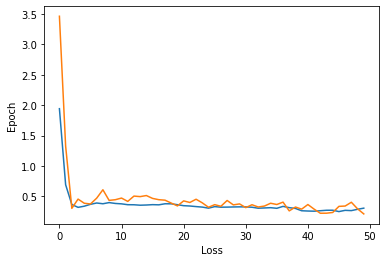

In [6]:
from vae import DeepAutoEncoder

model = DeepAutoEncoder(num_vis=num_vis, num_hid_1=256, num_hid_2=128)
model.fit(train, valid, 50, 8, 0.001)

In [7]:
model.write_recc_files()

2022-04-10 14:13:09.792427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:13:09.792917: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:13:09.793127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:13:09.793428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:13:09.793623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [8]:
data = reviews.pivot(index='user_id', values='rating', columns='recipe_id').fillna(0)
recipe_ids = data.columns
user_ids = data.index
values = data.values
preds = model.predict(values)
recs = []
pred_scores = pd.DataFrame(preds, columns=recipe_ids, index=user_ids).T
for user_id in user_ids:
    user_pred = pred_scores[[user_id]].sort_values(user_id, ascending=False)
    recipes_rec = user_pred.index[:10]
    recs.append(recipes_rec)
reccomendations = pd.DataFrame(recs, columns=range(1, 11))
reccomendations['user_id'] = user_ids

2022-04-10 14:13:11.740095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:13:11.740407: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:13:11.740591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:13:11.740732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:13:11.740846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S